>> Click en Run All ^^

# Descarga de geometrías (IGN, Censo CONICET)

Este notebook se encarga de descargar los datos geográficos oficiales. fuentes: el Instituto Geográfico Nacional (IGN). Fuente alternativa, Rodriguez CEUR CONICET. Aquí están los pasos que sigue este notebook:

**Descarga de los datos del Censo CONICET**: El notebook descarga archivos .rar que contienen los datos del censo para diferentes años si no existen ya en tu sistema.

**Extracción de los datos**: Una vez descargados los archivos .rar, el notebook los extrae automáticamente. ¡Ya tines todo listo para trabajar con los datos!

Este notebook es perfecto para descargar y preparar los datos geográficos necesarios para trabajar con los datos del censo. ¡No tenes que ser un experto en Python! El notebook hace todo el trabajo.

In [2]:
import os
from urllib.request import urlretrieve

# Attempt to import pyunpack, if it fails, install pyunpack and patool
try:
    from pyunpack import Archive
except ModuleNotFoundError:
    os.system('pip install pyunpack')
    os.system('pip install patool')
    from pyunpack import Archive

## Descarga de geometrias de CENSO de CONICET (Gonzalo Rodriguez)

In [28]:

# Obtaining the data from the URL's
url_front = 'http://ceur-conicet.gov.ar/archivos/transferencia/'

## Carpeta donde quedaran los shp
extract_dir = './censos_shp_CONICET'

for year in ['1991', '2001', '2010']:
    file_name = year+'_RADIOS_ARGENTINA.rar'
    full_file = os.path.join(os.getcwd(), extract_dir, file_name)
    extracted_folder_path = os.path.join(extract_dir, year+'_RADIOS ARGENTINA')

    # Descarga el rar solo si no existe.
    if not os.path.isfile(full_file):

        # Si no esta el directorio lo crea
        if not os.path.exists(extract_dir):
            os.makedirs(extract_dir)

        # Toma data del URL
        urlretrieve(url_front + file_name, full_file)
        
    # Extracts files only if the extracted folder does not exist.
    if not os.path.isdir(extracted_folder_path):
        Archive(full_file).extractall(extract_dir)

## Descarga de geometrias de IGN

In [3]:
import geopandas as gpd
import requests
import zipfile
import os
from io import BytesIO

# URL of the ZIP file
url = "http://www.ign.gob.ar/descargas/geodatos/SHAPES/ign_departamento.zip"

# Download the ZIP file with SSL certificate verification disabled
response = requests.get(url, verify=False)

# Specify the target directory for extraction
target_directory = "./IGN_shp/"

# Create the target directory if it doesn't exist
os.makedirs(target_directory, exist_ok=True)

# Extract the shapefile files from the ZIP archive to the target directory
with zipfile.ZipFile(BytesIO(response.content)) as zip_file:
    zip_file.extractall(target_directory)



/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ign.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/matias/anaconda3/envs/base2/lib/python3.11/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ign.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [9]:
# Listo, ya tenes los departamentos.
# Load the shapefile into a GeoDataFrame
shapefile_path = os.path.join(target_directory, "ign_departamento")
gdf = gpd.read_file(shapefile_path)
shapefile_path

'./IGN_shp/ign_departamento'

<Axes: >

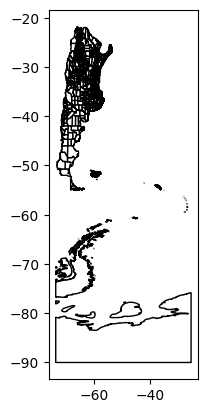

In [8]:
gdf.plot(color = 'w', edgecolor = 'k')

In [4]:
shapefile_path

'./IGN_shp/ign_departamento'

In [ ]:
### ALTERNATIVA DIRECTO DE IGN, TIENE ERORRES ESE DATASET. NO USAR

In [29]:
# Obtaining the data from the URL's
url_front = 'https://www.ign.gob.ar/descargas/geodatos/SHAPES/'

## Carpeta donde quedaran los shp
extract_dir = 'IGN_shp'

for file_name in ['ign_provincia.zip', 'ign_departamento.zip']:
    full_file = os.path.join(os.getcwd(), extract_dir, file_name)

    # Descarga el rar solo si no existe.
    if not os.path.isfile(full_file):
        # Si no esta el directorio lo crea
        if not os.path.exists(extract_dir):
            os.makedirs(extract_dir)

        # Toma data del URL
        urlretrieve(url_front + file_name, full_file)

    Archive(full_file).extractall(extract_dir)

In [30]:
extract_dir

'IGN_shp'

In [31]:
full_file

'/home/matias/repos/IGN_INDEC_georef/IGN_shp/ign_departamento.zip'